In [1]:
from keras import backend as K
from ImageLoader import TextImageLoader
from CRNN import *
import os
import matplotlib.pyplot as plt
import numpy as np

from parameter import *
from utils import *
import json

Using TensorFlow backend.


'./IIIT5K/train/' is used for testing.<br>
Because there is more data in the test image file, the test file iamges was used for training.

In [2]:
val_img_file_path = './IIIT5K/train/'
val_label_file_path = './IIIT5K/train_label/'

val_img_generator_params = {
    'img_path' : val_img_file_path,
    'label_path' : val_label_file_path,
    'img_w' : params['img_w'],
    'img_h' : params['img_h'],
    'batch_size' : 4,
    'downsample_factor' : params['downsample_factor'],
    'max_text_len' : params['max_text_len'],
    'do_shuffle' : params['do_shuffle']
}

In [3]:
val_dataloader = TextImageLoader(**val_img_generator_params)

Find  4  images
Find  4  labels


# TextImageLoader use

In [4]:
gener = val_dataloader.generator()
inputs, outputs = next(gener)

In [5]:
inputs.keys()

dict_keys(['the_labels', 'the_input', 'label_length', 'input_length'])

In [6]:
outputs.keys()

dict_keys(['ctc'])

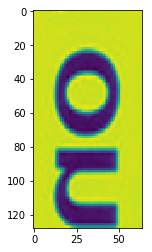

In [7]:
img1 = inputs['the_input'][0]
plt.imshow(np.squeeze(img1))

### the_input is image data value

In [8]:
inputs['the_input'].shape

(4, 128, 64, 1)

In [9]:
inputs['the_labels'].shape

(4, 12)

### Convert letters to numeric labels

In [10]:
inputs['the_labels']

array([[16., 15., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [46., 21.,  2., 21.,  6., -1., -1., -1., -1., -1., -1., -1.],
       [31., 32., 39., 36., 49., 32., 45., 52., -1., -1., -1., -1.],
       [39., 16.,  2., 15., 20., -1., -1., -1., -1., -1., -1., -1.]])

### input length for LSTM's input

In [11]:
inputs['input_length'] 

array([[30.],
       [30.],
       [30.],
       [30.]])

### length of text

In [12]:
inputs['label_length']

array([[2.],
       [5.],
       [8.],
       [5.]])

In [13]:
crnn_params = {
    'img_w' : params['img_w'],
    'img_h' : params['img_h'],
    'num_classes' : params['num_classes'],
    'max_text_len' : params['max_text_len'],
    'drop_rate' : params['drop_rate'],
    'weight_decay' : params['weight_decay'],
    'learning_rate' : 1e-3,
    'training' : True
    }

In [14]:
crnn_model = CRNN(**crnn_params)

In [15]:
try:
    crnn_model.saved_model_use('./save_model/crnn/crnn_weights.hdf5')
except:
    raise Exception("No weight!")

Loaded model from './save_model/crnn/crnn_weights.hdf5'


In [16]:
test_dir =val_img_file_path
test_imgs = os.listdir(val_img_file_path)
test_labels = os.listdir(val_label_file_path)

# Test images

In [17]:
total = 0
acc = 0
for k, test_img in enumerate(test_imgs):
    net_out_value = crnn_model.predict(test_dir + test_img)
    pred_texts= decode_label(net_out_value)

    jstring = open(val_label_file_path + os.path.splitext(test_img)[0] + '.json', "r").read()
    jstring = json.loads(jstring)

    chars = jstring['image_label']

    if pred_texts.lower() == chars.lower():
        acc += 1
    total += 1
    print(k,'/',len(test_imgs),"   ACC : ", acc / total)

    print('===')
    print('Predicted: %s  /  True: %s' % (pred_texts.lower(), chars.lower()))
    print('===')

print("TOTAL ACC : ", acc / total)

0 / 4    ACC :  1.0
===
Predicted: on  /  True: on
===
1 / 4    ACC :  1.0
===
Predicted: state  /  True: state
===
2 / 4    ACC :  1.0
===
Predicted: delivery  /  True: delivery
===
3 / 4    ACC :  1.0
===
Predicted: loans  /  True: loans
===
TOTAL ACC :  1.0


### result

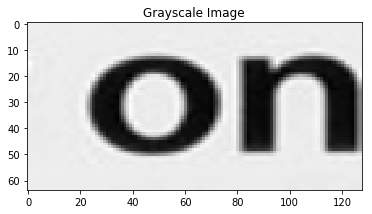

In [18]:
test_img = val_dataloader.total_img_list[0]
img_ex = val_dataloader.get_image(test_dir + test_img, val_dataloader.img_w, val_dataloader.img_h)

plt.imshow(img_ex, cmap='gray')
plt.title('Grayscale Image')
plt.show()

In [19]:
net_out_value = crnn_model.predict(test_dir + test_img)
pred_texts= decode_label(net_out_value)

jstring = open(val_label_file_path + os.path.splitext(test_img)[0] + '.json', "r").read()
jstring = json.loads(jstring)
chars = jstring['image_label']

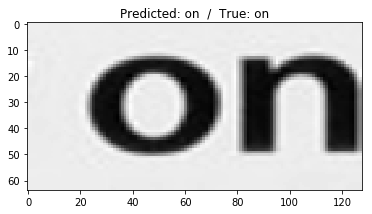

In [20]:
plt.imshow(img_ex, cmap='gray')
plt.title('Predicted: %s  /  True: %s' % (pred_texts.lower(), chars.lower()))
plt.show()


### show multi results

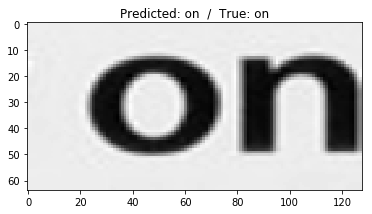

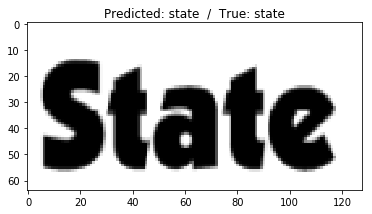

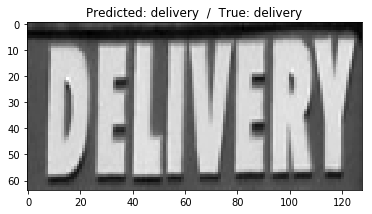

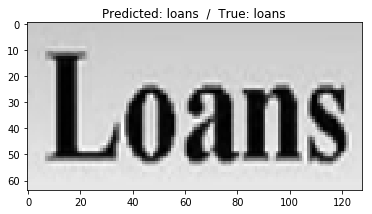

In [21]:
for i in range(4):
    test_img = val_dataloader.total_img_list[i]
    img_ex = val_dataloader.get_image(test_dir + test_img, val_dataloader.img_w, val_dataloader.img_h)
    
    net_out_value = crnn_model.predict(test_dir + test_img)
    pred_texts= decode_label(net_out_value)
    
    jstring = open(val_label_file_path + os.path.splitext(test_img)[0] + '.json', "r").read()
    jstring = json.loads(jstring)
    chars = jstring['image_label']
    
    plt.imshow(img_ex, cmap='gray')
    plt.title('Predicted: %s  /  True: %s' % (pred_texts.lower(), chars.lower()))
    plt.show()